In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [3]:
def odour_conc_landscape(dis, radius, centre, shape='Volcano', k=10.0, tau=0.1):
    if dis >= radius/2.0:
        c = k * np.exp(tau*(radius/2.0 - dis))
    else:
        if shape == 'Volcano':
            c = k * np.exp(tau*(dis - radius/2.0))
        elif shape == 'Well':
            c = 0.0
        elif shape == 'Mesa':
            c = k
        elif shape == 'Linear':
            c = k - 0.2 * (dis - radius/2.0)
        else:
            c = 0.0
    return c

def set_sub_ax_ticks_fontsize(ax, fontsize):
    ticks = ax.get_xticklabels()
    [tick.set_fontsize(fontsize) for tick in ticks]
    ticks = ax.get_yticklabels()
    [tick.set_fontsize(fontsize) for tick in ticks]

def set_compact_spines_format(ax, xticks=False):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if not xticks:
        ax.spines['bottom'].set_visible(False)
        ax.set_xticklabels([])
        ax.set_xticks([])

## Chemotaxis

[None, None, None, None, None]

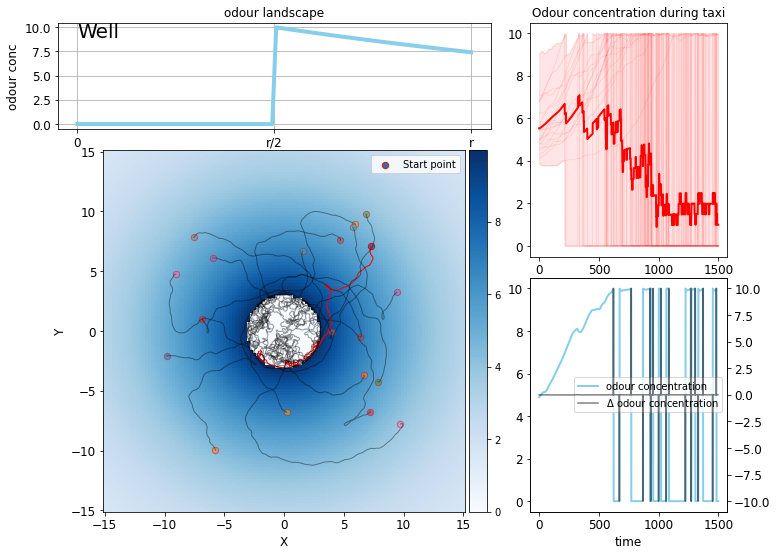

In [6]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12,9))
axes = []
gs = GridSpec(4, 3)

fontsize = 20
sub_fontsize = 12
odour_shape = 'Well'

# load data
data = sio.loadmat('results/chemotaxis_' + odour_shape + '.mat')
pos_s = data['pos']
h_s = data['h']
mesh_x, mesh_y, mesh_c = data['mesh_x'], data['mesh_y'], data['mesh_c']
odor_s = data['odor']

# odour curve
ax_odour_curve = plt.subplot(gs[0, :2])
axes.append(ax_odour_curve)
radius = 6
centre = [0, 0]
dis = np.linspace(0,radius,100)
c = np.zeros(dis.shape)
for i, d in enumerate(dis):
    c[i] = odour_conc_landscape(d, radius, centre, shape=odour_shape)
ax_odour_curve.plot(dis/radius, c, c='skyblue', lw=4, label=' ')
ax_odour_curve.text(0, np.max(c)*0.9, odour_shape, fontsize=20)
ax_odour_curve.set_ylabel('odour conc', fontsize=sub_fontsize)
ax_odour_curve.set_xticks([0, 0.5, 1])
ax_odour_curve.set_xticklabels(['0', 'r/2', 'r'])
ax_odour_curve.grid(1)
ax_odour_curve.set_title('odour landscape')


# heatmap + trajectory
ax_main = plt.subplot(gs[1:, :2])
axes.append(ax_main)
# odour concentration
heatmap = ax_main.pcolormesh(mesh_x, mesh_y, mesh_c, cmap='Blues',shading='auto')
# add colorar
colorbar = fig.colorbar(heatmap, ax=ax_main, fraction=0.05, pad=0.01)
# colorbar.set_label('Odour Concentration', fontsize=sub_fontsize)
selected_id = 10
pos = pos_s[selected_id]
 # start point
ax_main.scatter(pos[0,0],pos[0,1], s=40, marker='o', c=None, edgecolor='red', label='Start point')
ax_main.plot(pos[:,0],pos[:,1], c='red',lw=1.0)
for i, pos in enumerate(pos_s):
    if i!=selected_id:
        # start point
        ax_main.scatter(pos[0,0],pos[0,1],s=40, marker='o', c=None, edgecolor='red', alpha=0.5)
        # trajectory
        ax_main.plot(pos[:,0],pos[:,1], c='black',lw=1.0, alpha=0.4)
ax_main.set_xlabel('X', fontsize=sub_fontsize)
ax_main.set_ylabel('Y', fontsize=sub_fontsize)
ax_main.set_aspect(1)
ax_main.legend()
# ax_main.set_title('Chemotaxi trajectories')

# group data
ax_group = plt.subplot(gs[:2, 2])
axes.append(ax_group)

for i, odor_c in enumerate(odor_s):
    ax_group.plot(odor_c[:-1], c='red', alpha=0.1, lw=0.8)

ax_group.plot(np.mean(np.array(odor_s)[:,:-1], axis=0), color='red',lw=2, label='mean')
ax_group.fill_between(np.arange(0,len(pos_s[0])-1), np.max(np.array(odor_s)[:,:-1], axis=0), np.min(np.array(odor_s)[:,:-1], axis=0),
                  color='red', alpha=0.1)
ax_group.set_title('Odour concentration during taxi')

# individual data
ax_indal = plt.subplot(gs[2:, 2])
axes.append(ax_indal)
ax_w = ax_indal.twinx()
axes.append(ax_w)
delta_h = np.roll(h_s[selected_id][1:], 1) - h_s[selected_id][1:]
delta_h = (delta_h + np.pi) % (np.pi*2) - np.pi
delta_odor = np.roll(odor_s[selected_id][1:], 1) - odor_s[selected_id][1:]
l1 = ax_w.plot(delta_odor[1:-1], c='black', alpha=0.5, label=r'$\Delta$ odour concentration')
# ax_indal.scatter(np.arange(0,len(pos_s[0])-1), np.abs(delta_h)>0.2)
l2 = ax_indal.plot(odor_s[selected_id][:-1], c='skyblue', lw=2, label='odour concentration')
ax_indal.set_xlabel('time', fontsize=sub_fontsize)
ls = l2 + l1
labels = [l.get_label() for l in ls]
ax_indal.legend(ls, labels, loc=0)

# overall adjust
[set_sub_ax_ticks_fontsize(ax, sub_fontsize) for ax in axes]
# [ax.legend() for ax in axes]

# plt.savefig('../figs/subfigs/chemotaxi_results_' + odour_shape + '.pdf')

## wind direction encoding

In [116]:
# load data
data = sio.loadmat('results/wind_direction_encoding.mat')
wpn = data['wpn']
apn = data['apn']
b1 = data['b1']
heading = data['heading']
wind_dir = data['wind_dir']

In [135]:
np.linspace(0, np.pi, 5)

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265])

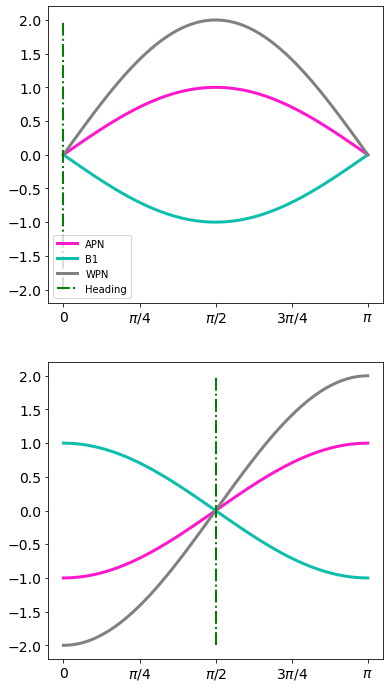

In [147]:
fig, ax = plt.subplots(2, 1, figsize=(6,12))
fontsize = 20
sub_fontsize = 14
for i, h in enumerate(heading):
    ax[i].plot(wind_dir[0]+np.pi, apn[i], c='#FE17CD', lw=3, label='APN')
    ax[i].plot(wind_dir[0]+np.pi, b1[i], c='#0CBEAB', lw=3, label='B1')
    ax[i].plot(wind_dir[0]+np.pi, wpn[i], c='gray', lw=3, label='WPN')
    # current heading
    ax[i].plot([heading[i], heading[i]], [-2, 2], lw=2, ls='-.', c='green', label='Heading')
    set_sub_ax_ticks_fontsize(ax[i], sub_fontsize)
    ax[i].set_xticks(np.linspace(0, np.pi, 5))
    ax[i].set_xticklabels(['0',r'$\pi/4$',r'$\pi/2$',r'$3\pi/4$',r'$\pi$']);
#     ax[i].grid(1)
ax[0].legend(loc='lower left')
# set_compact_spines_format(ax[0])
# set_compact_spines_format(ax[1],True)

plt.savefig('../figs/subfigs/wind_direction_encoding.pdf')

## anemotaxis

In [12]:
v_s.shape

(20, 200, 2)

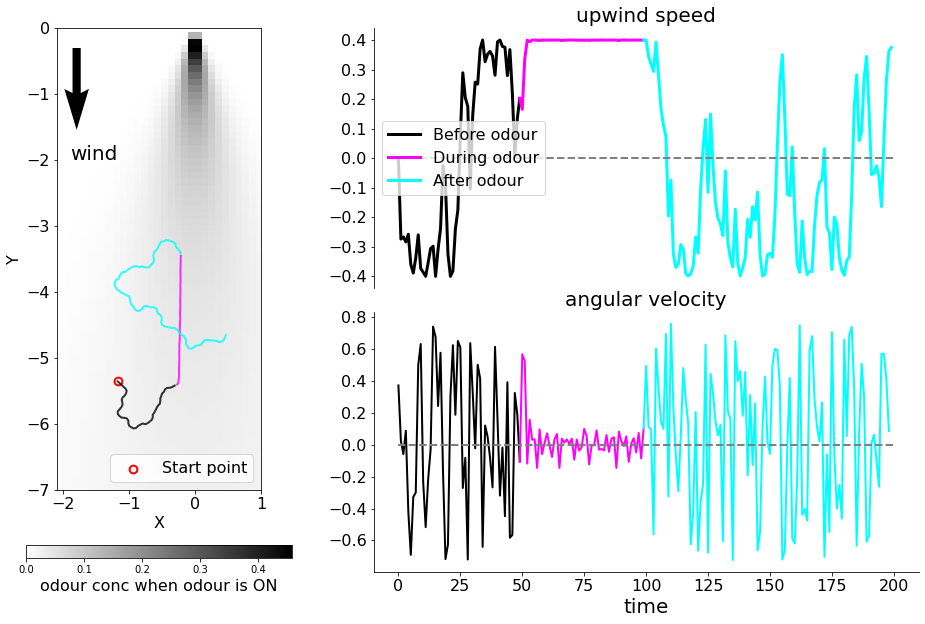

In [24]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(16,10))
axes = []
gs = GridSpec(4, 13)

fontsize = 20
sub_fontsize = 16

# load data
data = sio.loadmat('results/anemotaxis.mat')
pos_s = data['pos']/10.0
h_s = data['h']
mesh_x, mesh_y, mesh_c = data['mesh_x']/10, data['mesh_y']/10, data['mesh_c']
odor_s = data['odor']
odour_on_period = data['odour_daynamics'][0]
odour_input = data['odour_input'][0]
t_s = data['t_s'][0]
v_s = data['v']

# 1.heatmap and trajectories
ax_main = plt.subplot(gs[:,:4])
heatmap = ax_main.pcolormesh(mesh_x, mesh_y, mesh_c, cmap='gray_r', shading='auto')
selected_id = 3
pos = pos_s[selected_id]
# start point
ax_main.scatter(pos[0,0],pos[0,1], s=60, lw=2, marker='o', c='white', edgecolor='red', label='Start point')
ax_main.plot(pos[:odour_on_period[0],0],pos[:odour_on_period[0],1],c='black',lw=2.0, alpha=0.8)
ax_main.plot(pos[odour_on_period[0]:odour_on_period[1],0],pos[odour_on_period[0]:odour_on_period[1],1],
        alpha=0.8, c='magenta',lw=2.0)
ax_main.plot(pos[odour_on_period[1]:,0],pos[odour_on_period[1]:,1],
        alpha=0.8, c='cyan',lw=2.0)
# wind direction
ax_main.quiver(-1.8,-0.3,np.cos(-np.pi/2),np.sin(-np.pi/2),width=0.04,scale=2.5)
ax_main.text(-1.9,-2.0,'wind',fontsize=fontsize)
# add colorbar
colorbar = fig.colorbar(heatmap, ax=ax_main, fraction=0.05, pad=0.1, orientation='horizontal')
colorbar.set_label('odour conc when odour is ON', fontsize=sub_fontsize)
# adjust
ax_main.set_xlabel('X', fontsize=sub_fontsize)
ax_main.set_ylabel('Y', fontsize=sub_fontsize)
ax_main.set_aspect(1)
ax_main.set_xlim(-2.1,1)
ax_main.set_ylim(-7,0)
ax_main.legend(fontsize=sub_fontsize, loc=4)
set_sub_ax_ticks_fontsize(ax_main, sub_fontsize)

# 2.upwind speed
ax_upwind_s = plt.subplot(gs[:2, 5:])
upwind_v = np.zeros([v_s.shape[1]])
for j in range(v_s.shape[1]):
        upwind_v[j] = np.sqrt(np.sum(v_s[selected_id][j][0]**2 + v_s[selected_id][j][1]**2)) * np.sin(np.arctan2(v_s[selected_id][j][1], v_s[selected_id][j][0]))
mean_upwind_s = upwind_v
ax_upwind_s.plot(np.arange(0,odour_on_period[0]), mean_upwind_s[0:odour_on_period[0]], c='black', lw=3, label='Before odour')
ax_upwind_s.plot(np.arange(odour_on_period[0]-1, odour_on_period[1]), mean_upwind_s[odour_on_period[0]-1:odour_on_period[1]], c='magenta', lw=3, label='During odour')
ax_upwind_s.plot(np.arange(odour_on_period[1]-1, len(mean_upwind_s)), mean_upwind_s[odour_on_period[1]-1:], c='cyan', lw=3, label='After odour')
ax_upwind_s.plot([0, len(mean_upwind_s)], [0, 0], ls='--', lw=2.0, color='gray')
# ax_upwind_s.set_ylabel('upwind speed', fontsize=sub_fontsize)
ax_upwind_s.set_title('upwind speed', fontsize=fontsize)
ax_upwind_s.legend(fontsize=sub_fontsize)
# ax_upwind_s.fill_between(np.arange(0,min(t_s)), np.max((upwind_v)[:,:min(t_s)], axis=0), np.min((upwind_v)[:,:min(t_s)], axis=0),
#                   color='red', alpha=0.1)
set_sub_ax_ticks_fontsize(ax_upwind_s, sub_fontsize)
set_compact_spines_format(ax_upwind_s)

ax_curvature = plt.subplot(gs[2:, 5:])
ax_curvature.set_xlabel('time',fontsize=fontsize)

mean_curvature = np.diff(h_s[selected_id])
mean_curvature = (mean_curvature + np.pi) % (np.pi*2) - np.pi
ax_curvature.plot(np.arange(0,odour_on_period[0]), mean_curvature[0:odour_on_period[0]], c='black', lw=2)
ax_curvature.plot(np.arange(odour_on_period[0]-1, odour_on_period[1]), mean_curvature[odour_on_period[0]-1:odour_on_period[1]], c='magenta', lw=2)
ax_curvature.plot(np.arange(odour_on_period[1]-1, len(mean_curvature)), mean_curvature[odour_on_period[1]-1:], c='cyan', lw=2)
# ax_curvature.set_ylabel('angular velocity', fontsize=sub_fontsize)
ax_curvature.set_title('angular velocity', fontsize=fontsize)
ax_curvature.plot([0, len(mean_upwind_s)], [0, 0], ls='--', lw=2.0, color='gray')
set_sub_ax_ticks_fontsize(ax_curvature, sub_fontsize)
set_compact_spines_format(ax_curvature, xticks=True)

plt.savefig('../submission/subfigs/anemotaxis_results_singleAgent.pdf')


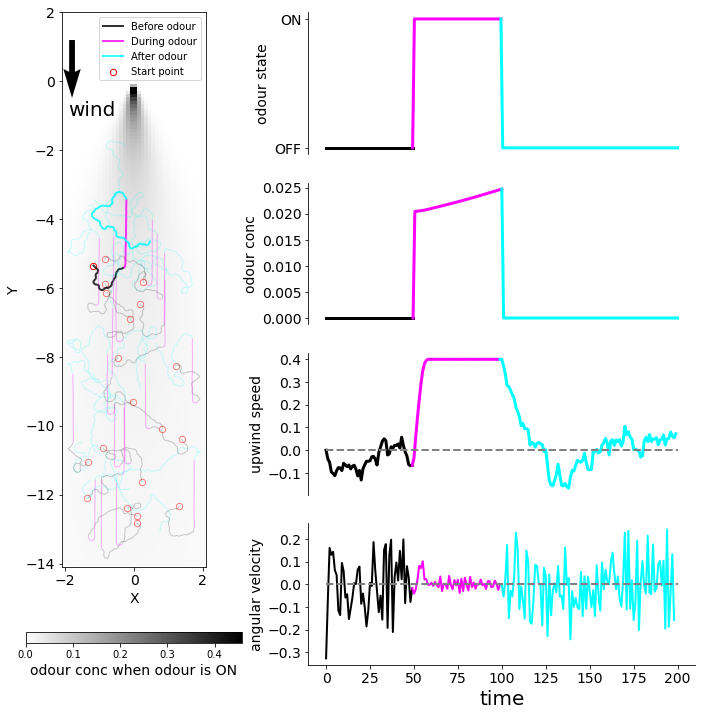

In [86]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12,12))
axes = []
gs = GridSpec(4, 13)

fontsize = 20
sub_fontsize = 14

# load data
data = sio.loadmat('results/anemotaxis.mat')
pos_s = data['pos']/10.0
h_s = data['h']
mesh_x, mesh_y, mesh_c = data['mesh_x']/10, data['mesh_y']/10, data['mesh_c']
odor_s = data['odor']
odour_on_period = data['odour_daynamics'][0]
odour_input = data['odour_input'][0]
t_s = data['t_s'][0]
v_s = data['v']

# 1.heatmap and trajectories
ax_main = plt.subplot(gs[:,:4])
heatmap = ax_main.pcolormesh(mesh_x, mesh_y, mesh_c, cmap='gray_r', shading='auto')
selected_id = 3
pos = pos_s[selected_id]
# start point
ax_main.scatter(pos[0,0],pos[0,1], s=40, marker='o', c='white', edgecolor='red', label='Start point')
ax_main.plot(pos[:odour_on_period[0],0],pos[:odour_on_period[0],1],c='black',lw=2.0, alpha=0.8, label='Before odour')
ax_main.plot(pos[odour_on_period[0]:odour_on_period[1],0],pos[odour_on_period[0]:odour_on_period[1],1],
        alpha=0.8, c='magenta',lw=2.0,label='During odour')
ax_main.plot(pos[odour_on_period[1]:,0],pos[odour_on_period[1]:,1],
        alpha=0.8, c='cyan',lw=2.0, label='After odour')
for i, pos in enumerate(pos_s):
    if i!=selected_id:
        # start point
        ax_main.scatter(pos[0,0],pos[0,1],s=40, marker='o', c='white', edgecolor='red', alpha=0.5)
        # trajectory
        ax_main.plot(pos[:odour_on_period[0],0],pos[:odour_on_period[0],1],c='black',lw=1.0, alpha=0.2)
        ax_main.plot(pos[odour_on_period[0]:odour_on_period[1],0],pos[odour_on_period[0]:odour_on_period[1],1],
                alpha=0.3, c='magenta',lw=1.0)
        ax_main.plot(pos[odour_on_period[1]:,0],pos[odour_on_period[1]:,1],
                alpha=0.2, c='cyan',lw=1.0)
# wind direction
ax_main.quiver(-1.8,1.2,np.cos(-np.pi/2),np.sin(-np.pi/2),width=0.04,scale=2.5)
ax_main.text(-1.9,-1.0,'wind',fontsize=fontsize)
# add colorbar
colorbar = fig.colorbar(heatmap, ax=ax_main, fraction=0.05, pad=0.1, orientation='horizontal')
colorbar.set_label('odour conc when odour is ON', fontsize=sub_fontsize)
# adjust
ax_main.set_xlabel('X', fontsize=sub_fontsize)
ax_main.set_ylabel('Y', fontsize=sub_fontsize)
ax_main.set_aspect(1)
ax_main.set_xlim(-2.1,2.1)
ax_main.set_ylim(-14.1,2)
ax_main.legend()
set_sub_ax_ticks_fontsize(ax_main, sub_fontsize)

# 2.odour dynamic
ax_odour_dy = plt.subplot(gs[0, 5:])
# ax_odour_dy.plot(odour_input, lw=3.0, color='black')
ax_odour_dy.set_yticks([0,1])
ax_odour_dy.set_yticklabels(['OFF','ON'])
ax_odour_dy.plot(np.arange(0,odour_on_period[0]), odour_input[0:odour_on_period[0]], c='black', lw=3)
ax_odour_dy.plot(np.arange(odour_on_period[0]-1, odour_on_period[1]), odour_input[odour_on_period[0]-1:odour_on_period[1]], c='magenta', lw=3)
ax_odour_dy.plot(np.arange(odour_on_period[1]-1, len(odour_input)), odour_input[odour_on_period[1]-1:], c='cyan', lw=3)
ax_odour_dy.set_ylabel('odour state', fontsize=sub_fontsize)
set_compact_spines_format(ax_odour_dy)
set_sub_ax_ticks_fontsize(ax_odour_dy, sub_fontsize)

# 3.odour sensed
ax_odour_sensed = plt.subplot(gs[1, 5:])
# for i, odor_c in enumerate(odor_s):
# #     ax_odour_sensed.plot(odor_c[:-1], c='red', alpha=0.1, lw=2)
# ax_odour_sensed.fill_between(np.arange(0,min(t_s)), np.max(np.array(odor_s)[:,:min(t_s)], axis=0), np.min(np.array(odor_s)[:,:min(t_s)], axis=0),
#                   color='red', alpha=0.1)

mean_odour_sensed = np.mean(np.array(odor_s)[:,:-1], axis=0)
# ax_odour_sensed.plot(, color='red',lw=2)
ax_odour_sensed.plot(np.arange(0,odour_on_period[0]), mean_odour_sensed[0:odour_on_period[0]], c='black', lw=3)
ax_odour_sensed.plot(np.arange(odour_on_period[0]-1, odour_on_period[1]), mean_odour_sensed[odour_on_period[0]-1:odour_on_period[1]], c='magenta', lw=3)
ax_odour_sensed.plot(np.arange(odour_on_period[1]-1, len(mean_odour_sensed)), mean_odour_sensed[odour_on_period[1]-1:], c='cyan', lw=3)
ax_odour_sensed.set_ylabel('odour conc', fontsize=sub_fontsize)
set_compact_spines_format(ax_odour_sensed)
set_sub_ax_ticks_fontsize(ax_odour_sensed, sub_fontsize)

# 4.upwind speed
ax_upwind_s = plt.subplot(gs[2, 5:])

upwind_v = np.zeros([v_s.shape[0],v_s.shape[1]])
for i in range(v_s.shape[0]):
    for j in range(v_s.shape[1]):
        upwind_v[i,j] = np.sqrt(np.sum(v_s[i][j][0]**2 + v_s[i][j][1]**2)) * np.sin(np.arctan2(v_s[i][j][1], v_s[i][j][0]))
mean_upwind_s = np.mean(upwind_v, axis=0)
# ax_upwind_s.plot(np.mean(upwind_v[:,:-1], axis=0), color='red',lw=2)
ax_upwind_s.plot(np.arange(0,odour_on_period[0]), mean_upwind_s[0:odour_on_period[0]], c='black', lw=3)
ax_upwind_s.plot(np.arange(odour_on_period[0]-1, odour_on_period[1]), mean_upwind_s[odour_on_period[0]-1:odour_on_period[1]], c='magenta', lw=3)
ax_upwind_s.plot(np.arange(odour_on_period[1]-1, len(mean_upwind_s)), mean_upwind_s[odour_on_period[1]-1:], c='cyan', lw=3)
ax_upwind_s.plot([0, len(mean_upwind_s)], [0, 0], ls='--', lw=2.0, color='gray')
ax_upwind_s.set_ylabel('upwind speed', fontsize=sub_fontsize)
# ax_upwind_s.fill_between(np.arange(0,min(t_s)), np.max((upwind_v)[:,:min(t_s)], axis=0), np.min((upwind_v)[:,:min(t_s)], axis=0),
#                   color='red', alpha=0.1)
set_sub_ax_ticks_fontsize(ax_upwind_s, sub_fontsize)
set_compact_spines_format(ax_upwind_s)

# curvature
ax_curvature = plt.subplot(gs[3, 5:])
ax_curvature.set_xlabel('time',fontsize=fontsize)
delta_h = np.zeros([v_s.shape[0], v_s.shape[1]-1])
for i in range(h_s.shape[0]):
    delta_h[i] = np.roll(h_s[i][1:], 1) - h_s[i][1:]
    delta_h[i] = (delta_h[i] + np.pi) % (np.pi*2) - np.pi
mean_curvature = np.mean(delta_h[1:-1], axis=0)

ax_curvature.plot(np.arange(0,odour_on_period[0]), mean_curvature[0:odour_on_period[0]], c='black', lw=2)
ax_curvature.plot(np.arange(odour_on_period[0]-1, odour_on_period[1]), mean_curvature[odour_on_period[0]-1:odour_on_period[1]], c='magenta', lw=2)
ax_curvature.plot(np.arange(odour_on_period[1]-1, len(mean_curvature)), mean_curvature[odour_on_period[1]-1:], c='cyan', lw=2)
ax_curvature.set_ylabel('angular velocity', fontsize=sub_fontsize)
ax_curvature.plot([0, len(mean_upwind_s)], [0, 0], ls='--', lw=2.0, color='gray')
set_sub_ax_ticks_fontsize(ax_curvature, sub_fontsize)
set_compact_spines_format(ax_curvature, xticks=True)

plt.savefig('../figs/subfigs/anemotaxis_results_samll.pdf')

## Integrated- ON and OFF response

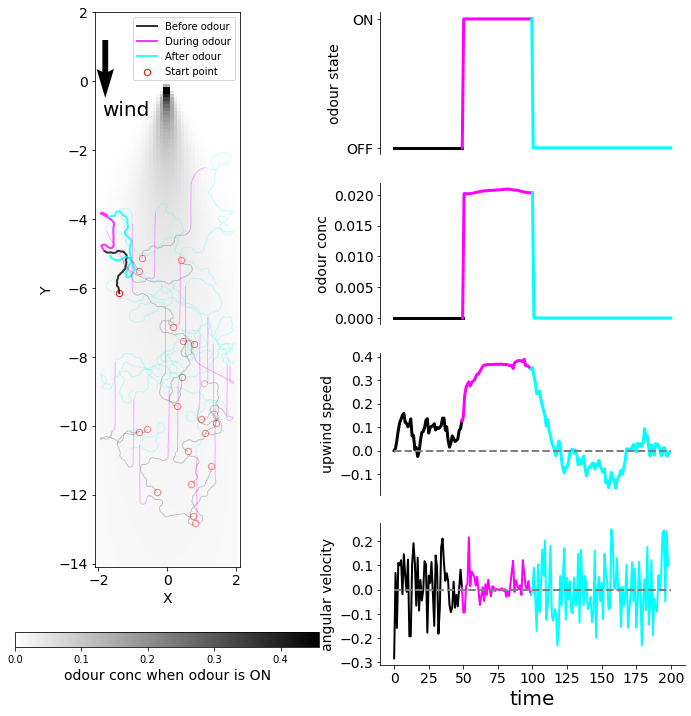

In [27]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(12,12))
axes = []
gs = GridSpec(4, 13)

fontsize = 20
sub_fontsize = 14

# load data
data = sio.loadmat('results/integrated.mat')
pos_s = data['pos']/10.0
h_s = data['h']
mesh_x, mesh_y, mesh_c = data['mesh_x']/10, data['mesh_y']/10, data['mesh_c']
odor_s = data['odor']
odour_on_period = data['odour_daynamics'][0]
odour_input = data['odour_input'][0]
t_s = data['t_s'][0]
v_s = data['v']
response_state = data['response_state']

# 1.heatmap and trajectories
ax_main = plt.subplot(gs[:,:6])
heatmap = ax_main.pcolormesh(mesh_x, mesh_y, mesh_c, cmap='gray_r', shading='auto')
selected_id = 7
pos = pos_s[selected_id]
# start point
ax_main.scatter(pos[0,0],pos[0,1], s=40, marker='o', c='white', edgecolor='red', label='Start point')
ax_main.plot(pos[:odour_on_period[0],0],pos[:odour_on_period[0],1],c='black',lw=2.0, alpha=0.8, label='Before odour')
ax_main.plot(pos[odour_on_period[0]:odour_on_period[1],0],pos[odour_on_period[0]:odour_on_period[1],1],
        alpha=0.8, c='magenta',lw=2.0,label='During odour')
ax_main.plot(pos[odour_on_period[1]:,0],pos[odour_on_period[1]:,1],
        alpha=0.8, c='cyan',lw=2.0, label='After odour')
for i, pos in enumerate(pos_s):
    if i!=selected_id:
        # start point
        ax_main.scatter(pos[0,0],pos[0,1],s=40, marker='o', c='white', edgecolor='red', alpha=0.5)
        # trajectory
        ax_main.plot(pos[:odour_on_period[0],0],pos[:odour_on_period[0],1],c='black',lw=1.0, alpha=0.2)
        ax_main.plot(pos[odour_on_period[0]:odour_on_period[1],0],pos[odour_on_period[0]:odour_on_period[1],1],
                alpha=0.3, c='magenta',lw=1.0)
        ax_main.plot(pos[odour_on_period[1]:,0],pos[odour_on_period[1]:,1],
                alpha=0.2, c='cyan',lw=1.0)
# wind direction
ax_main.quiver(-1.8,1.2,np.cos(-np.pi/2),np.sin(-np.pi/2),width=0.04,scale=2.5)
ax_main.text(-1.9,-1.0,'wind',fontsize=fontsize)
# add colorbar
colorbar = fig.colorbar(heatmap, ax=ax_main, fraction=0.05, pad=0.1, orientation='horizontal')
colorbar.set_label('odour conc when odour is ON', fontsize=sub_fontsize)
# adjust
ax_main.set_xlabel('X', fontsize=sub_fontsize)
ax_main.set_ylabel('Y', fontsize=sub_fontsize)
ax_main.set_aspect(1)
ax_main.set_xlim(-2.1,2.1)
ax_main.set_ylim(-14.1,2)
ax_main.legend()
set_sub_ax_ticks_fontsize(ax_main, sub_fontsize)

# 2.odour dynamic
ax_odour_dy = plt.subplot(gs[0, 7:])
# ax_odour_dy.plot(odour_input, lw=3.0, color='black')
ax_odour_dy.set_yticks([0,1])
ax_odour_dy.set_yticklabels(['OFF','ON'])
ax_odour_dy.plot(np.arange(0,odour_on_period[0]), odour_input[0:odour_on_period[0]], c='black', lw=3)
ax_odour_dy.plot(np.arange(odour_on_period[0]-1, odour_on_period[1]), odour_input[odour_on_period[0]-1:odour_on_period[1]], c='magenta', lw=3)
ax_odour_dy.plot(np.arange(odour_on_period[1]-1, len(odour_input)), odour_input[odour_on_period[1]-1:], c='cyan', lw=3)
ax_odour_dy.set_ylabel('odour state', fontsize=sub_fontsize)
set_compact_spines_format(ax_odour_dy)
set_sub_ax_ticks_fontsize(ax_odour_dy, sub_fontsize)

# 3.odour sensed
ax_odour_sensed = plt.subplot(gs[1, 7:])
# for i, odor_c in enumerate(odor_s):
# #     ax_odour_sensed.plot(odor_c[:-1], c='red', alpha=0.1, lw=2)
# ax_odour_sensed.fill_between(np.arange(0,min(t_s)), np.max(np.array(odor_s)[:,:min(t_s)], axis=0), np.min(np.array(odor_s)[:,:min(t_s)], axis=0),
#                   color='red', alpha=0.1)

mean_odour_sensed = np.mean(np.array(odor_s)[:,:-1], axis=0)
# ax_odour_sensed.plot(, color='red',lw=2)
ax_odour_sensed.plot(np.arange(0,odour_on_period[0]), mean_odour_sensed[0:odour_on_period[0]], c='black', lw=3)
ax_odour_sensed.plot(np.arange(odour_on_period[0]-1, odour_on_period[1]), mean_odour_sensed[odour_on_period[0]-1:odour_on_period[1]], c='magenta', lw=3)
ax_odour_sensed.plot(np.arange(odour_on_period[1]-1, len(mean_odour_sensed)), mean_odour_sensed[odour_on_period[1]-1:], c='cyan', lw=3)
ax_odour_sensed.set_ylabel('odour conc', fontsize=sub_fontsize)
set_compact_spines_format(ax_odour_sensed)
set_sub_ax_ticks_fontsize(ax_odour_sensed, sub_fontsize)

# 4.upwind speed
ax_upwind_s = plt.subplot(gs[2, 7:])

upwind_v = np.zeros([v_s.shape[0],v_s.shape[1]])
for i in range(v_s.shape[0]):
    for j in range(v_s.shape[1]):
        upwind_v[i,j] = np.sqrt(np.sum(v_s[i][j][0]**2 + v_s[i][j][1]**2)) * np.sin(np.arctan2(v_s[i][j][1], v_s[i][j][0]))
mean_upwind_s = np.mean(upwind_v, axis=0)
# ax_upwind_s.plot(np.mean(upwind_v[:,:-1], axis=0), color='red',lw=2)
ax_upwind_s.plot(np.arange(0,odour_on_period[0]), mean_upwind_s[0:odour_on_period[0]], c='black', lw=3)
ax_upwind_s.plot(np.arange(odour_on_period[0]-1, odour_on_period[1]), mean_upwind_s[odour_on_period[0]-1:odour_on_period[1]], c='magenta', lw=3)
ax_upwind_s.plot(np.arange(odour_on_period[1]-1, len(mean_upwind_s)), mean_upwind_s[odour_on_period[1]-1:], c='cyan', lw=3)
ax_upwind_s.plot([0, len(mean_upwind_s)], [0, 0], ls='--', lw=2.0, color='gray')
ax_upwind_s.set_ylabel('upwind speed', fontsize=sub_fontsize)
# ax_upwind_s.fill_between(np.arange(0,min(t_s)), np.max((upwind_v)[:,:min(t_s)], axis=0), np.min((upwind_v)[:,:min(t_s)], axis=0),
#                   color='red', alpha=0.1)
set_sub_ax_ticks_fontsize(ax_upwind_s, sub_fontsize)
set_compact_spines_format(ax_upwind_s)

# curvature
ax_curvature = plt.subplot(gs[3, 7:])
ax_curvature.set_xlabel('time',fontsize=fontsize)
delta_h = np.zeros([v_s.shape[0], v_s.shape[1]-1])
for i in range(h_s.shape[0]):
    delta_h[i] = np.roll(h_s[i][1:], 1) - h_s[i][1:]
    delta_h[i] = (delta_h[i] + np.pi) % (np.pi*2) - np.pi
mean_curvature = np.mean(delta_h[1:-1], axis=0)

ax_curvature.plot(np.arange(0,odour_on_period[0]), mean_curvature[0:odour_on_period[0]], c='black', lw=2)
ax_curvature.plot(np.arange(odour_on_period[0]-1, odour_on_period[1]), mean_curvature[odour_on_period[0]-1:odour_on_period[1]], c='magenta', lw=2)
ax_curvature.plot(np.arange(odour_on_period[1]-1, len(mean_curvature)), mean_curvature[odour_on_period[1]-1:], c='cyan', lw=2)
ax_curvature.set_ylabel('angular velocity', fontsize=sub_fontsize)
ax_curvature.plot([0, len(mean_upwind_s)], [0, 0], ls='--', lw=2.0, color='gray')
set_sub_ax_ticks_fontsize(ax_curvature, sub_fontsize)
set_compact_spines_format(ax_curvature, xticks=True)

# plt.savefig('../figs/subfigs/on_off_integration_group.pdf')

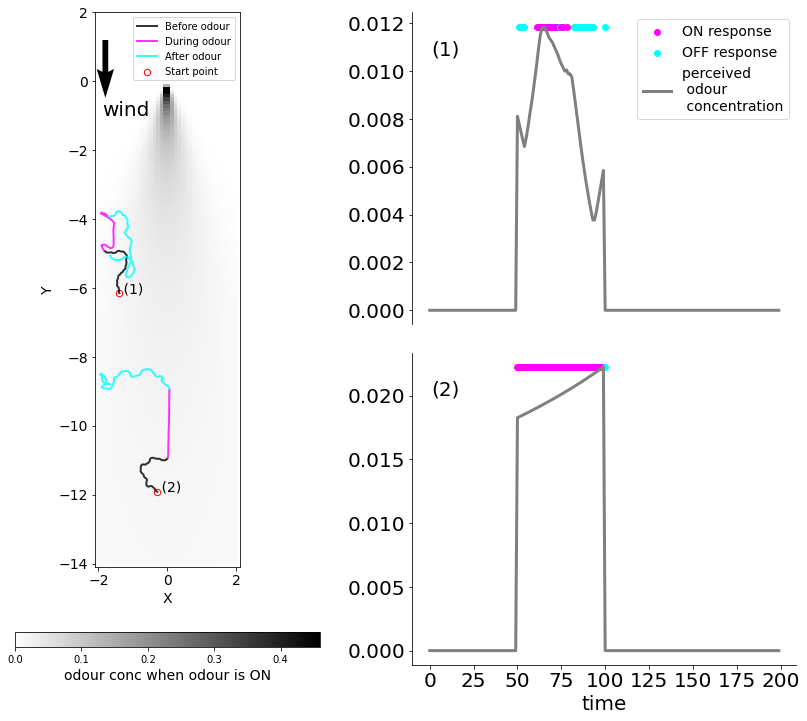

In [64]:
# show individual ON and OFF responses
fig = plt.figure(figsize=(14,12))
axes = []
gs = GridSpec(4, 10)

ax_main = plt.subplot(gs[:,:4])

heatmap = ax_main.pcolormesh(mesh_x, mesh_y, mesh_c, cmap='gray_r', shading='auto')
selected_ids = [7,19]
for i,sid in enumerate(selected_ids):
    pos = pos_s[sid]
    # start point
    sp=ax_main.scatter(pos[0,0],pos[0,1], s=40, marker='o', c='white', edgecolor='red', label='Start point')
    ax_main.text(pos[0,0],pos[0,1],' (' + str(i+1) + ')',fontsize=sub_fontsize)
    l1,=ax_main.plot(pos[:odour_on_period[0],0],pos[:odour_on_period[0],1],c='black',lw=2.0, alpha=0.8, label='Before odour')
    l2,=ax_main.plot(pos[odour_on_period[0]:odour_on_period[1],0],pos[odour_on_period[0]:odour_on_period[1],1],
            alpha=0.8, c='magenta',lw=2.0,label='During odour')
    l3,=ax_main.plot(pos[odour_on_period[1]:,0],pos[odour_on_period[1]:,1],
            alpha=0.8, c='cyan',lw=2.0, label='After odour')
# wind direction
ax_main.quiver(-1.8,1.2,np.cos(-np.pi/2),np.sin(-np.pi/2),width=0.04,scale=2.5)
ax_main.text(-1.9,-1.0,'wind',fontsize=fontsize)
# add colorbar
colorbar = fig.colorbar(heatmap, ax=ax_main, fraction=0.05, pad=0.1, orientation='horizontal')
colorbar.set_label('odour conc when odour is ON', fontsize=sub_fontsize)
# adjust
ax_main.set_xlabel('X', fontsize=sub_fontsize)
ax_main.set_ylabel('Y', fontsize=sub_fontsize)
ax_main.set_aspect(1)
ax_main.set_xlim(-2.1,2.1)
ax_main.set_ylim(-14.1,2)
s = (l1, l2, l3, sp)
ax_main.legend(s,[l.get_label() for l in s])
set_sub_ax_ticks_fontsize(ax_main, sub_fontsize)

ax1 = plt.subplot(gs[:2, 5:])
odour_s, = ax1.plot(odor_s[selected_ids[0]], lw=3.0, c='gray')
ax1.text(1, 0.9*np.max(odor_s[selected_ids[0]]), '(1)', color='black', fontsize=fontsize)
# state_temp = [0.5 for i in range(len(response_state[selected_ids[0]]))]
# state_temp = [1 if state='ON response' else 0 for state in response_state[selected_ids[0]]]
for i, state in enumerate(response_state[selected_ids[0]]):
#     print(state)
    if state == 'ON response ':
        s_on = ax1.scatter(i, np.max(odor_s[selected_ids[0]]), marker='o', c='magenta', label=state)
    if state == 'OFF response':
        s_off = ax1.scatter(i, np.max(odor_s[selected_ids[0]]), marker='o', c='cyan', label=state)
ax1.legend((s_on, s_off, odour_s),(s_on.get_label(), s_off.get_label(), 'perceived \n odour \n concentration'), fontsize=sub_fontsize)
set_sub_ax_ticks_fontsize(ax1, fontsize)
set_compact_spines_format(ax1)

ax2 = plt.subplot(gs[2:, 5:])
odour_s = ax2.plot(odor_s[selected_ids[1]], lw=3.0, c='gray')
ax2.text(1, 0.9*np.max(odor_s[selected_ids[1]]), '(2)', color='black', fontsize=fontsize)
# state_temp = [0.5 for i in range(len(response_state[selected_ids[0]]))]
# state_temp = [1 if state='ON response' else 0 for state in response_state[selected_ids[0]]]
for i, state in enumerate(response_state[selected_ids[1]]):
#     print(state)
    if state == 'ON response ':
        s_on = ax2.scatter(i, np.max(odor_s[selected_ids[1]]), marker='o', c='magenta', label=state)
    if state == 'OFF response':
        s_off = ax2.scatter(i, np.max(odor_s[selected_ids[1]]), marker='o', c='cyan', label=state)
# ax2.legend((s_on, s_off),(s_on.get_label(), s_off.get_label()), fontsize=sub_fontsize)
set_sub_ax_ticks_fontsize(ax2, fontsize)
set_compact_spines_format(ax2, True)
ax2.set_xlabel('time', fontsize=fontsize)
plt.savefig('../figs/subfigs/on_off_integration_individual.pdf')

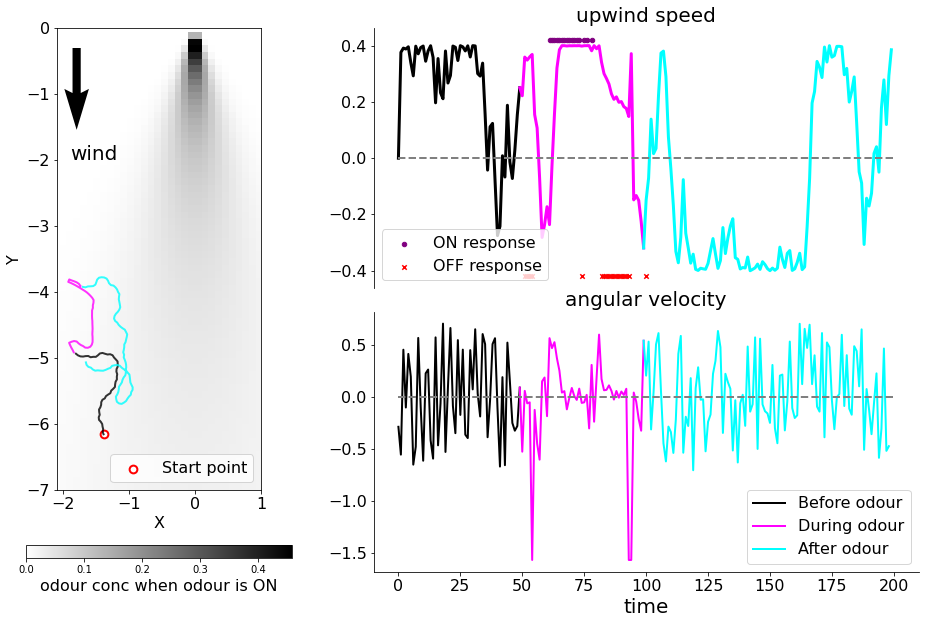

In [45]:
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(16,10))
axes = []
gs = GridSpec(4, 13)

fontsize = 20
sub_fontsize = 16

# load data
data = sio.loadmat('results/integrated.mat')
pos_s = data['pos']/10.0
h_s = data['h']
mesh_x, mesh_y, mesh_c = data['mesh_x']/10, data['mesh_y']/10, data['mesh_c']
odor_s = data['odor']
odour_on_period = data['odour_daynamics'][0]
odour_input = data['odour_input'][0]
t_s = data['t_s'][0]
v_s = data['v']
response_state = data['response_state']

# 1.heatmap and trajectories
ax_main = plt.subplot(gs[:,:4])
heatmap = ax_main.pcolormesh(mesh_x, mesh_y, mesh_c, cmap='gray_r', shading='auto')
selected_id = 7
pos = pos_s[selected_id]
# start point
ax_main.scatter(pos[0,0],pos[0,1], s=60, lw=2, marker='o', c='white', edgecolor='red', label='Start point')
ax_main.plot(pos[:odour_on_period[0],0],pos[:odour_on_period[0],1],c='black',lw=2.0, alpha=0.8)
ax_main.plot(pos[odour_on_period[0]:odour_on_period[1],0],pos[odour_on_period[0]:odour_on_period[1],1],
        alpha=0.8, c='magenta',lw=2.0)
ax_main.plot(pos[odour_on_period[1]:,0],pos[odour_on_period[1]:,1],
        alpha=0.8, c='cyan',lw=2.0)
# wind direction
ax_main.quiver(-1.8,-0.3,np.cos(-np.pi/2),np.sin(-np.pi/2),width=0.04,scale=2.5)
ax_main.text(-1.9,-2.0,'wind',fontsize=fontsize)
# add colorbar
colorbar = fig.colorbar(heatmap, ax=ax_main, fraction=0.05, pad=0.1, orientation='horizontal')
colorbar.set_label('odour conc when odour is ON', fontsize=sub_fontsize)
# adjust
ax_main.set_xlabel('X', fontsize=sub_fontsize)
ax_main.set_ylabel('Y', fontsize=sub_fontsize)
ax_main.set_aspect(1)
ax_main.set_xlim(-2.1,1)
ax_main.set_ylim(-7,0)
ax_main.legend(fontsize=sub_fontsize, loc=4)
set_sub_ax_ticks_fontsize(ax_main, sub_fontsize)

# 2.upwind speed
ax_upwind_s = plt.subplot(gs[:2, 5:])
upwind_v = np.zeros([v_s.shape[1]])
for j in range(v_s.shape[1]):
        upwind_v[j] = np.sqrt(np.sum(v_s[selected_id][j][0]**2 + v_s[selected_id][j][1]**2)) * np.sin(np.arctan2(v_s[selected_id][j][1], v_s[selected_id][j][0]))
mean_upwind_s = upwind_v
ax_upwind_s.plot(np.arange(0,odour_on_period[0]), mean_upwind_s[0:odour_on_period[0]], c='black', lw=3, label='Before odour')
ax_upwind_s.plot(np.arange(odour_on_period[0]-1, odour_on_period[1]), mean_upwind_s[odour_on_period[0]-1:odour_on_period[1]], c='magenta', lw=3, label='During odour')
ax_upwind_s.plot(np.arange(odour_on_period[1]-1, len(mean_upwind_s)), mean_upwind_s[odour_on_period[1]-1:], c='cyan', lw=3, label='After odour')
ax_upwind_s.plot([0, len(mean_upwind_s)], [0, 0], ls='--', lw=2.0, color='gray')
# ax_upwind_s.set_ylabel('upwind speed', fontsize=sub_fontsize)
ax_upwind_s.set_title('upwind speed', fontsize=fontsize)
ax_upwind_s.legend(fontsize=sub_fontsize)
# ax_upwind_s.fill_between(np.arange(0,min(t_s)), np.max((upwind_v)[:,:min(t_s)], axis=0), np.min((upwind_v)[:,:min(t_s)], axis=0),
#                   color='red', alpha=0.1)
set_sub_ax_ticks_fontsize(ax_upwind_s, sub_fontsize)
set_compact_spines_format(ax_upwind_s)

ax_curvature = plt.subplot(gs[2:, 5:])
ax_curvature.set_xlabel('time',fontsize=fontsize)

mean_curvature = np.diff(h_s[selected_id])
mean_curvature = (mean_curvature + np.pi) % (np.pi*2) - np.pi
ax_curvature.plot(np.arange(0,odour_on_period[0]), mean_curvature[0:odour_on_period[0]], c='black', lw=2,label='Before odour')
ax_curvature.plot(np.arange(odour_on_period[0]-1, odour_on_period[1]), mean_curvature[odour_on_period[0]-1:odour_on_period[1]], c='magenta', lw=2,label='During odour')
ax_curvature.plot(np.arange(odour_on_period[1]-1, len(mean_curvature)), mean_curvature[odour_on_period[1]-1:], c='cyan', lw=2,label='After odour')
# ax_curvature.set_ylabel('angular velocity', fontsize=sub_fontsize)
ax_curvature.set_title('angular velocity', fontsize=fontsize)
ax_curvature.plot([0, len(mean_upwind_s)], [0, 0], ls='--', lw=2.0, color='gray')
set_sub_ax_ticks_fontsize(ax_curvature, sub_fontsize)
set_compact_spines_format(ax_curvature, xticks=True)
ax_curvature.legend(fontsize=sub_fontsize)
for i, state in enumerate(response_state[selected_id]):
#     print(state)
    if state == 'ON response ':
        s_on = ax_upwind_s.scatter(i, 0.42, marker='o', c='purple', label=state, s=20)
    if state == 'OFF response':
        s_off = ax_upwind_s.scatter(i, -0.42, marker='x', c='red', label=state, s=20)
ax_upwind_s.legend((s_on, s_off),(s_on.get_label(), s_off.get_label()), fontsize=sub_fontsize)
plt.savefig('../submission/subfigs/on_off_switching_singleAgent.pdf')

## Ants odour navigation with PI

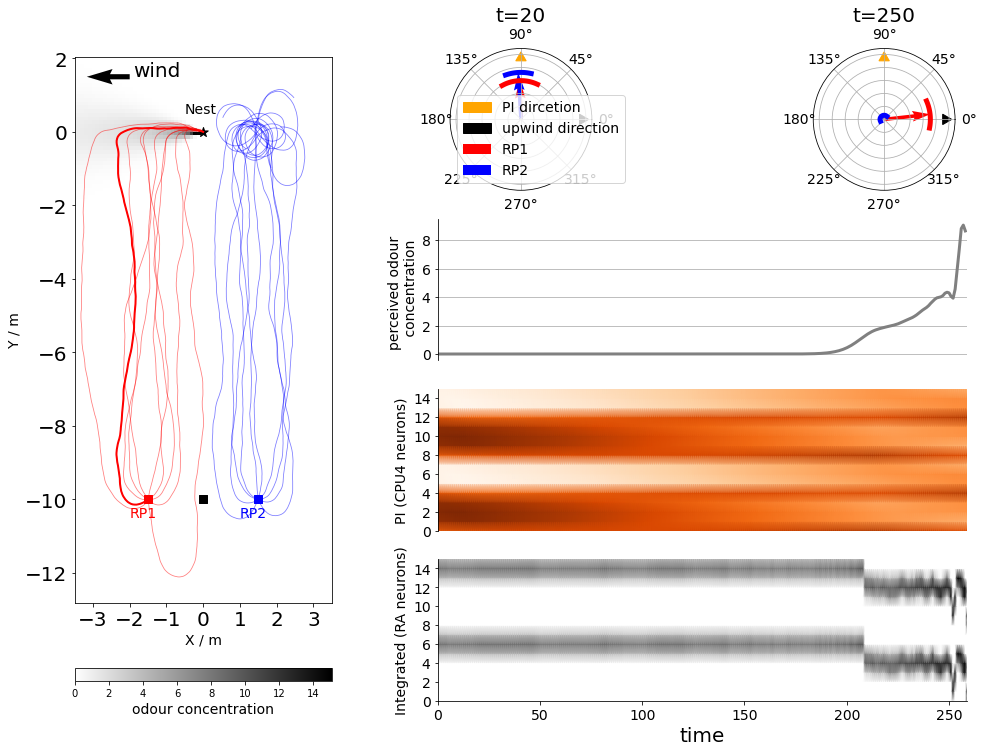

In [180]:
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

import circular_statistics as cs

fig = plt.figure(figsize=(16,12))
axes = []
gs = GridSpec(4, 10)

fontsize = 20
sub_fontsize = 14

# load data
data = sio.loadmat('results/ants_integrated.mat')
pos_s = data['pos']
h_s = data['h']
mesh_x, mesh_y, mesh_c = data['mesh_x'], data['mesh_y'], data['mesh_c']
odor_s = data['odor'][0]
t_s = data['t_s'][0]
v_s = data['v']
response_state = data['response_state']
dis_s = data['dis']
pi_memory_s = data['pi_memory']
ra_memory_s = data['ra_memory']

select_id = 1

# main figure
ax_main = plt.subplot(gs[:,:3])
# odour filed
heatmap = ax_main.pcolormesh(mesh_x, mesh_y, mesh_c, cmap='gray_r', shading='auto')
# add colorbar
colorbar = fig.colorbar(heatmap, ax=ax_main, fraction=0.05, pad=0.1, orientation='horizontal')
colorbar.set_label('odour concentration', fontsize=sub_fontsize)
# feeder
ax_main.scatter(0,-10,marker='s',c='black',s=80)
# nest
ax_main.scatter(0,0,marker='*',c='black',s=100)
ax_main.text(-0.5,0.5,'Nest',color='black',fontsize=sub_fontsize)
# RP1
ax_main.scatter(-1.5,-10, marker='s',c='red',s=80)
ax_main.text(-2,-10.5,'RP1',color='red',fontsize=sub_fontsize)
# RP2
ax_main.scatter(1.5,-10 ,marker='s',c='blue',s=80)
ax_main.text(1,-10.5,'RP2',color='blue',fontsize=sub_fontsize)
# wind direction
ax_main.quiver(-2,1.5,np.cos(np.pi),np.sin(np.pi),width=0.02,scale=6)
ax_main.text(-1.9,1.5,'wind',fontsize=fontsize)
# trajectories
ax_main.plot(pos_s[select_id][:, 0], pos_s[select_id][:, 1], lw=2.0, color='red')
for i, pos in enumerate(pos_s):
    lc = 'red' if i < len(pos_s)/2 else 'blue'
    ax_main.plot(pos[:,0],pos[:,1], c=lc, lw=0.8, alpha=0.5)
set_sub_ax_ticks_fontsize(ax_main, fontsize=fontsize)
ax_main.set_xlim(-3.5,3.5)
ax_main.set_aspect(1)
ax_main.set_xlabel('X / m', fontsize=sub_fontsize)
ax_main.set_ylabel('Y / m', fontsize=sub_fontsize)

# group data-direction
# PI direction and upwind direction
d_pi = np.pi/2
d_uw = 0
tri_len = 0.8
tri_pos_l = 5.2
tri_pi = plt.Polygon([[d_pi,tri_pos_l],
                      [d_pi+np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)],
                      [d_pi-np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)]],
                    color='orange',label='PI dircetion')
tri_uw = plt.Polygon([[d_uw,tri_pos_l],
                      [d_uw+np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)],
                      [d_uw-np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)]],
                    color='black',label='upwind direction')
ax_s_dir = plt.subplot(gs[0, 4:6],projection='polar')
ax_s_dir.add_patch(tri_pi)
ax_s_dir.add_patch(tri_uw)
cp_h_rp1 = h_s[:int(len(h_s)/2), 20]
cp_h_rp2 = h_s[int(len(h_s)/2):, 20]
acc = 120 # 5deg goniometer
d_ref = np.linspace(0,2*np.pi,acc)
if len(cp_h_rp1):
    h_r, h_mean, h_sd0, h_ci95, r_num = cs.circular_statistics(cp_h_rp1,acc=acc)
    ax_s_dir.quiver(0,0,h_r*np.cos(h_mean),h_r*np.sin(h_mean),color='r', scale=0.5,scale_units='y',width=0.025,label='RP1')
    ax_s_dir.plot(np.linspace(h_mean-h_ci95,h_mean+h_ci95,20),np.repeat(h_r*4,20),color='red',lw=5)
if len(cp_h_rp2):
    h_r, h_mean, h_sd0, h_ci95, r_num = cs.circular_statistics(cp_h_rp2,acc=acc)
    ax_s_dir.quiver(0,0,h_r*np.cos(h_mean),h_r*np.sin(h_mean),color='blue', scale=0.5,scale_units='y',width=0.025,label='RP2')
    ax_s_dir.plot(np.linspace(h_mean-h_ci95,h_mean+h_ci95,20),np.repeat(h_r*4,20),color='blue',lw=5)
# ax_f_dir.scatter(h_mean-h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
# ax_f_dir.scatter(h_mean+h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
ax_s_dir.set_yticklabels('')
set_sub_ax_ticks_fontsize(ax_s_dir, sub_fontsize)
ax_s_dir.legend(fontsize=sub_fontsize)
ax_s_dir.set_title('t=20',fontsize=fontsize)

ax_f_dir = plt.subplot(gs[0, 8:10],projection='polar')
tri_pi1 = plt.Polygon([[d_pi,tri_pos_l],
                      [d_pi+np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)],
                      [d_pi-np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)]],
                    color='orange',label='PI dircetion')
tri_uw1 = plt.Polygon([[d_uw,tri_pos_l],
                      [d_uw+np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)],
                      [d_uw-np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)]],
                    color='black',label='upwind direction')
ax_f_dir.add_patch(tri_pi1)
ax_f_dir.add_patch(tri_uw1)
# calculate the heading across the 0.2m radius circle
# cp_ind = cs.get_check_points_index_from_p(0.4, pos_s, [0,0])
# cp_h = np.array([h_s[i][cp_ind[i]] for i in range(int(len(pos_s)))])
# cp_h_rp1 = cp_h[:int(len(pos_s)/2)]
# cp_h_rp1 = cp_h_rp1[np.where(cp_ind[:int(len(pos_s)/2)]!=0)]
# cp_h_rp2 = cp_h[int(len(pos_s)/2):]
# cp_h_rp2 = cp_h_rp2[np.where(cp_ind[int(len(pos_s)/2):]!=0)] 
cp_h_rp1 = h_s[:int(len(h_s)/2), -50]
cp_h_rp2 = h_s[int(len(h_s)/2):, -50]
acc = 120 # 5deg goniometer
d_ref = np.linspace(0,2*np.pi,acc)
if len(cp_h_rp1):
    h_r, h_mean, h_sd0, h_ci95, r_num = cs.circular_statistics(cp_h_rp1,acc=acc)
    ax_f_dir.quiver(0,0,h_r*np.cos(h_mean),h_r*np.sin(h_mean),color='red', scale=0.5,scale_units='y',width=0.025,label='RP1')
    ax_f_dir.plot(np.linspace(h_mean-h_ci95,h_mean+h_ci95,20),np.repeat(h_r*4,20),color='red',lw=5)
if len(cp_h_rp2):
    h_r, h_mean, h_sd0, h_ci95, r_num = cs.circular_statistics(cp_h_rp2,acc=acc)
    ax_f_dir.quiver(0,0,h_r*np.cos(h_mean),h_r*np.sin(h_mean),color='blue', scale=0.5,scale_units='y',width=0.025,label='RP2')
    ax_f_dir.plot(np.linspace(h_mean-h_ci95,h_mean+h_ci95,20),np.repeat(h_r*4,20),color='blue',lw=5)
# ax_f_dir.scatter(h_mean-h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
# ax_f_dir.scatter(h_mean+h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
ax_f_dir.set_yticklabels('')
set_sub_ax_ticks_fontsize(ax_f_dir, sub_fontsize)
# ax_f_dir.legend(fontsize=sub_fontsize)
ax_f_dir.set_title('t=250',fontsize=fontsize)


# individual data
ax_indi_odor = plt.subplot(gs[1, 4:])
ax_indi_odor.plot(np.arange(t_s[select_id]), odor_s[select_id][0][:t_s[select_id]], lw=3, color='gray')
# ax_indi_odor.text(2, np.max(odor_s[select_id][0][:t_s[select_id]])*0.8, 'perceived odour \n concentration',fontsize=sub_fontsize)
ax_indi_odor.set_xlim(0, t_s[select_id])
ax_indi_odor.grid()
ax_indi_odor.set_ylabel('perceived odour \n concentration',fontsize=sub_fontsize)
set_sub_ax_ticks_fontsize(ax_indi_odor,sub_fontsize)
set_compact_spines_format(ax_indi_odor)

ax_indi_pi = plt.subplot(gs[2, 4:])
ax_indi_pi.pcolormesh(np.arange(t_s[select_id]), np.arange(16), pi_memory_s[select_id][:t_s[select_id]].T, shading='gouraud', cmap='Oranges_r')
ax_indi_pi.set_yticks(np.arange(0,16,2))
ax_indi_pi.set_ylabel('PI (CPU4 neurons)', fontsize=sub_fontsize)
set_sub_ax_ticks_fontsize(ax_indi_pi,sub_fontsize)
set_compact_spines_format(ax_indi_pi)

ax_indi_ra = plt.subplot(gs[3, 4:])
# ax_indi_dis.plot(dis_s[select_id][0][:t_s[select_id]], lw=3, color='gray')
ax_indi_ra.pcolormesh(np.arange(t_s[select_id]), np.arange(16), ra_memory_s[select_id][:t_s[select_id]].T, shading='gouraud', cmap='gray_r')
ax_indi_ra.set_yticks(np.arange(0,16,2))
set_sub_ax_ticks_fontsize(ax_indi_ra,sub_fontsize)
ax_indi_ra.set_xlabel('time', fontsize=fontsize)
ax_indi_ra.set_ylabel('Integrated (RA neurons)', fontsize=sub_fontsize)
set_compact_spines_format(ax_indi_ra, True)

plt.savefig('../figs/subfigs/ants_integration_results.pdf')

In [18]:
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

import circular_statistics as cs

fig = plt.figure(figsize=(16,12))
axes = []
gs = GridSpec(4, 10)

fontsize = 20
sub_fontsize = 14

# load data
# data = sio.loadmat('results/ants_integrated_k0_5.mat')
data = sio.loadmat('results/ants_integrated_add_odour_t300_k_0_5.mat')
pos_s = data['pos']
h_s = data['h']
mesh_x, mesh_y, mesh_c = data['mesh_x'], data['mesh_y'], data['mesh_c']
if 'mesh_x_add' in data.keys():
    mesh_x_add, mesh_y_add, mesh_c_add = data['mesh_x_add'], data['mesh_y_add'], data['mesh_c_add']
odor_s = data['odor'][0]
t_s = data['t_s'][0]
v_s = data['v']
response_state = data['response_state']
dis_s = data['dis']
pi_memory_s = data['pi_memory']
ra_memory_s = data['ra_memory']

select_id = 1

# main figure
ax_main = plt.subplot(gs[:,:3])
# odour filed
heatmap = ax_main.pcolormesh(mesh_x, mesh_y, mesh_c, cmap='gray_r', shading='auto')
if 'mesh_x_add' in data.keys():
    heatmap = ax_main.pcolormesh(mesh_x_add, mesh_y_add, mesh_c_add, cmap='gray_r', shading='auto')

# add colorbar
colorbar = fig.colorbar(heatmap, ax=ax_main, fraction=0.05, pad=0.1, orientation='horizontal')
colorbar.set_label('odour concentration', fontsize=sub_fontsize)
# feeder
ax_main.scatter(0,-10,marker='s',c='black',s=80)
ax_main.text(0, -10.5, 'Feeder', color='black',fontsize=sub_fontsize)
# nest
ax_main.scatter(0,0,marker='*',c='black',s=100)
ax_main.text(-0.5,0.5,'Nest',color='black',fontsize=sub_fontsize)
if 'mesh_x_add' in data.keys():
    ax_main.text(-2,-8.5,'conspecific nest',color='black',fontsize=sub_fontsize)
# RP1
ax_main.scatter(-1.5,-10, marker='s',c='red',s=80)
ax_main.text(-2,-10.5,'RP1',color='red',fontsize=sub_fontsize)
# RP2
ax_main.scatter(1.5,-10 ,marker='s',c='blue',s=80)
ax_main.text(1,-10.5,'RP2',color='blue',fontsize=sub_fontsize)
# wind direction
ax_main.quiver(-2,1.5,np.cos(np.pi),np.sin(np.pi),width=0.02,scale=6)
ax_main.text(-1.9,1.5,'wind',fontsize=fontsize)
# trajectories
ax_main.plot(pos_s[select_id][:, 0], pos_s[select_id][:, 1], lw=2.0, color='red')
for i, pos in enumerate(pos_s):
    lc = 'red' if i < len(pos_s)/2 else 'blue'
    ax_main.plot(pos[:,0],pos[:,1], c=lc, lw=0.8, alpha=0.5)
set_sub_ax_ticks_fontsize(ax_main, fontsize=fontsize)
ax_main.set_xlim(-3.5,3.5)
ax_main.set_aspect(1)
ax_main.set_xlabel('X / m', fontsize=sub_fontsize)
ax_main.set_ylabel('Y / m', fontsize=sub_fontsize)

# group data-direction
# PI direction and upwind direction
d_pi = np.pi/2
d_uw = 0
tri_len = 0.8
tri_pos_l = 5.2
tri_pi = plt.Polygon([[d_pi,tri_pos_l],
                      [d_pi+np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)],
                      [d_pi-np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)]],
                    color='orange',label='PI dircetion')
tri_uw = plt.Polygon([[d_uw,tri_pos_l],
                      [d_uw+np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)],
                      [d_uw-np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)]],
                    color='black',label='upwind direction')
ax_s_dir = plt.subplot(gs[0, 4:6],projection='polar')
ax_s_dir.add_patch(tri_pi)
ax_s_dir.add_patch(tri_uw)
cp_h_rp1 = h_s[:int(len(h_s)/2), 20]
cp_h_rp2 = h_s[int(len(h_s)/2):, 20]
acc = 120 # 5deg goniometer
d_ref = np.linspace(0,2*np.pi,acc)
if len(cp_h_rp1):
    h_r, h_mean, h_sd0, h_ci95, r_num = cs.circular_statistics(cp_h_rp1,acc=acc)
    ax_s_dir.quiver(0,0,h_r*np.cos(h_mean),h_r*np.sin(h_mean),color='r', scale=0.5,scale_units='y',width=0.025,label='RP1')
    ax_s_dir.plot(np.linspace(h_mean-h_ci95,h_mean+h_ci95,20),np.repeat(h_r*4,20),color='red',lw=5)
if len(cp_h_rp2):
    h_r, h_mean, h_sd0, h_ci95, r_num = cs.circular_statistics(cp_h_rp2,acc=acc)
    ax_s_dir.quiver(0,0,h_r*np.cos(h_mean),h_r*np.sin(h_mean),color='blue', scale=0.5,scale_units='y',width=0.025,label='RP2')
    ax_s_dir.plot(np.linspace(h_mean-h_ci95,h_mean+h_ci95,20),np.repeat(h_r*4,20),color='blue',lw=5)
# ax_f_dir.scatter(h_mean-h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
# ax_f_dir.scatter(h_mean+h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
ax_s_dir.set_yticklabels('')
set_sub_ax_ticks_fontsize(ax_s_dir, sub_fontsize)
# legend = ax_s_dir.get_legend()
# legend = ax_s_dir.legend(fontsize=sub_fontsize, loc='right')
ax_s_dir.set_title('t=20',fontsize=fontsize)
ax_dir_legend = plt.subplot(gs[0, 6:8])
ax_dir_legend.plot([],[],lw=5,color='black',label='upwind direction')
ax_dir_legend.plot([],[],lw=5,color='orange',label='PI dircetion')
ax_dir_legend.plot([],[],lw=5,color='red',label='RP1')
ax_dir_legend.plot([],[],lw=5,color='blue',label='RP2')
ax_dir_legend.legend(fontsize=sub_fontsize, loc="center", bbox_to_anchor=(0.5, 0.5))
ax_dir_legend.set_axis_off()

ax_f_dir = plt.subplot(gs[0, 8:10],projection='polar')
tri_pi1 = plt.Polygon([[d_pi,tri_pos_l],
                      [d_pi+np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)],
                      [d_pi-np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)]],
                    color='orange',label='PI dircetion')
tri_uw1 = plt.Polygon([[d_uw,tri_pos_l],
                      [d_uw+np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)],
                      [d_uw-np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)]],
                    color='black',label='upwind direction')
ax_f_dir.add_patch(tri_pi1)
ax_f_dir.add_patch(tri_uw1)
# calculate the heading across the 0.2m radius circle
# cp_ind = cs.get_check_points_index_from_p(0.4, pos_s, [0,0])
# cp_h = np.array([h_s[i][cp_ind[i]] for i in range(int(len(pos_s)))])
# cp_h_rp1 = cp_h[:int(len(pos_s)/2)]
# cp_h_rp1 = cp_h_rp1[np.where(cp_ind[:int(len(pos_s)/2)]!=0)]
# cp_h_rp2 = cp_h[int(len(pos_s)/2):]
# cp_h_rp2 = cp_h_rp2[np.where(cp_ind[int(len(pos_s)/2):]!=0)] 
cp_h_rp1 = h_s[:int(len(h_s)/2), -50]
cp_h_rp2 = h_s[int(len(h_s)/2):, -50]
acc = 120 # 5deg goniometer
d_ref = np.linspace(0,2*np.pi,acc)
if len(cp_h_rp1):
    h_r, h_mean, h_sd0, h_ci95, r_num = cs.circular_statistics(cp_h_rp1,acc=acc)
    ax_f_dir.quiver(0,0,h_r*np.cos(h_mean),h_r*np.sin(h_mean),color='red', scale=0.5,scale_units='y',width=0.025,label='RP1')
    ax_f_dir.plot(np.linspace(h_mean-h_ci95,h_mean+h_ci95,20),np.repeat(h_r*4,20),color='red',lw=5)
if len(cp_h_rp2):
    h_r, h_mean, h_sd0, h_ci95, r_num = cs.circular_statistics(cp_h_rp2,acc=acc)
    ax_f_dir.quiver(0,0,h_r*np.cos(h_mean),h_r*np.sin(h_mean),color='blue', scale=0.5,scale_units='y',width=0.025,label='RP2')
    ax_f_dir.plot(np.linspace(h_mean-h_ci95,h_mean+h_ci95,20),np.repeat(h_r*4,20),color='blue',lw=5)
# ax_f_dir.scatter(h_mean-h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
# ax_f_dir.scatter(h_mean+h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
ax_f_dir.set_yticklabels('')
set_sub_ax_ticks_fontsize(ax_f_dir, sub_fontsize)
# ax_f_dir.legend(fontsize=sub_fontsize)
ax_f_dir.set_title('t=250',fontsize=fontsize)


# individual data
ax_indi_odor = plt.subplot(gs[1, 4:])
ax_indi_odor.plot(np.arange(t_s[select_id]), odor_s[select_id][0][:t_s[select_id]], lw=3, color='gray')
# ax_indi_odor.text(2, np.max(odor_s[select_id][0][:t_s[select_id]])*0.8, 'perceived odour \n concentration',fontsize=sub_fontsize)
ax_indi_odor.set_xlim(0, t_s[select_id])
ax_indi_odor.grid()
ax_indi_odor.set_ylabel('perceived odour \n concentration',fontsize=sub_fontsize)
set_sub_ax_ticks_fontsize(ax_indi_odor,sub_fontsize)
set_compact_spines_format(ax_indi_odor)

ax_indi_pi = plt.subplot(gs[2, 4:])
ax_indi_pi.pcolormesh(np.arange(t_s[select_id]), np.arange(16), pi_memory_s[select_id][:t_s[select_id]].T, shading='gouraud', cmap='Oranges_r')
ax_indi_pi.set_yticks(np.arange(0,16,2))
ax_indi_pi.set_ylabel('PI (CPU4 neurons)', fontsize=sub_fontsize)
set_sub_ax_ticks_fontsize(ax_indi_pi,sub_fontsize)
set_compact_spines_format(ax_indi_pi)

ax_indi_ra = plt.subplot(gs[3, 4:])
# ax_indi_dis.plot(dis_s[select_id][0][:t_s[select_id]], lw=3, color='gray')
ax_indi_ra.pcolormesh(np.arange(t_s[select_id]), np.arange(16), ra_memory_s[select_id][:t_s[select_id]].T, shading='gouraud', cmap='gray_r')
ax_indi_ra.set_yticks(np.arange(0,16,2))
set_sub_ax_ticks_fontsize(ax_indi_ra,sub_fontsize)
ax_indi_ra.set_xlabel('time', fontsize=fontsize)
ax_indi_ra.set_ylabel('Integrated (RA neurons)', fontsize=sub_fontsize)
set_compact_spines_format(ax_indi_ra, True)

# plt.savefig('../figs/subfigs/ants_integration_results_add_odour.pdf')
plt.savefig('../submission/subfigs/ants_integration_results_add_odour.pdf')

FileNotFoundError: [Errno 2] No such file or directory: 'results/ants_integrated_add_odour_t300_k0_5.mat'

<Figure size 1152x864 with 0 Axes>

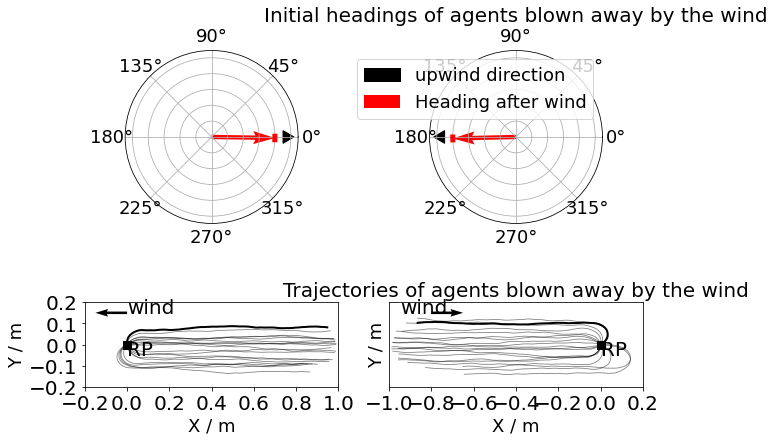

In [51]:
import circular_statistics as cs

fontsize = 20
sub_fontsize = 18

fig = plt.figure(figsize=(10,7))

# load data for westward wind
data_west_wind = sio.loadmat('results/WindCompensating_WeswardtWind.mat')
h_s = data_west_wind['h']
pos_s = data_west_wind['pos']

d_uw = 0
tri_len = 0.8
tri_pos_l = 5.2
tri_uw = plt.Polygon([[d_uw,tri_pos_l],
                      [d_uw+np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)],
                      [d_uw-np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)]],
                    color='black',label='upwind direction')
ax_s_dir = fig.add_subplot(221, projection='polar')
ax_s_dir.add_patch(tri_uw)
cp_h = h_s[:, 30]
acc = 120 # 5deg goniometer
d_ref = np.linspace(0,2*np.pi,acc)
if len(cp_h):
    h_r, h_mean, h_sd0, h_ci95, r_num = cs.circular_statistics(cp_h,acc=acc)
    ax_s_dir.quiver(0,0,h_r*np.cos(h_mean),h_r*np.sin(h_mean),color='r', scale=0.5,scale_units='y',width=0.025,label='Heading after wind')
    ax_s_dir.plot(np.linspace(h_mean-h_ci95,h_mean+h_ci95,20),np.repeat(h_r*4,20),color='red',lw=5)

# ax_f_dir.scatter(h_mean-h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
# ax_f_dir.scatter(h_mean+h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
ax_s_dir.set_yticklabels('')
set_sub_ax_ticks_fontsize(ax_s_dir, sub_fontsize)
# ax_s_dir.legend(fontsize=sub_fontsize)
# ax_s_dir.set_title('Initial Heading',fontsize=fontsize)

# # trajectories
select_id = 1
ax_main = fig.add_subplot(223)
ax_main.plot(pos_s[select_id][:, 0], pos_s[select_id][:, 1], lw=2.0, color='k')
for i, pos in enumerate(pos_s):
    ax_main.plot(pos[:,0],pos[:,1], c='k', lw=0.8, alpha=0.5)
set_sub_ax_ticks_fontsize(ax_main, fontsize=fontsize)
# RP
ax_main.scatter(0,0, marker='s',c='k',s=80)
ax_main.text(0,-0.05,'RP',color='k',fontsize=fontsize)
# wind direction
ax_main.quiver(0,0.15,np.cos(np.pi),np.sin(np.pi),width=0.01,scale=8)
ax_main.text(0,0.15,'wind',fontsize=fontsize)

ax_main.set_xlim(-0.2,1)
ax_main.set_ylim(-0.2,0.2)
ax_main.set_aspect(1)
ax_main.set_xlabel('X / m', fontsize=sub_fontsize)
ax_main.set_ylabel('Y / m', fontsize=sub_fontsize)

# load data for eastward wind
data_east_wind = sio.loadmat('results/WindCompensating_EastwardWind.mat')
h_s = data_east_wind['h']
pos_s = data_east_wind['pos']

d_uw = np.pi
tri_len = 0.8
tri_pos_l = 5.2
tri_uw = plt.Polygon([[d_uw,tri_pos_l],
                      [d_uw+np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)],
                      [d_uw-np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)]],
                    color='black',label='upwind direction')
ax_e_dir = fig.add_subplot(222, projection='polar')
ax_e_dir.add_patch(tri_uw)
cp_h = h_s[:, 30]
acc = 120 # 5deg goniometer
d_ref = np.linspace(0,2*np.pi,acc)
if len(cp_h):
    h_r, h_mean, h_sd0, h_ci95, r_num = cs.circular_statistics(cp_h,acc=acc)
    ax_e_dir.quiver(0,0,h_r*np.cos(h_mean),h_r*np.sin(h_mean),color='r', scale=0.5,scale_units='y',width=0.025,label='Heading after wind')
    ax_e_dir.plot(np.linspace(h_mean-h_ci95,h_mean+h_ci95,20),np.repeat(h_r*4,20),color='red',lw=5)

# ax_f_dir.scatter(h_mean-h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
# ax_f_dir.scatter(h_mean+h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
ax_e_dir.set_yticklabels('')
set_sub_ax_ticks_fontsize(ax_e_dir, sub_fontsize)
ax_e_dir.legend(fontsize=sub_fontsize)
ax_e_dir.set_title('Initial headings of agents blown away by the wind',fontsize=fontsize)

# # trajectories
select_id = 1
ax_main_e = fig.add_subplot(224)
ax_main_e.plot(pos_s[select_id][:, 0], pos_s[select_id][:, 1], lw=2.0, color='k')
for i, pos in enumerate(pos_s):
    ax_main_e.plot(pos[:,0],pos[:,1], c='k', lw=0.8, alpha=0.5)
set_sub_ax_ticks_fontsize(ax_main_e, fontsize=fontsize)

# RP
ax_main_e.scatter(0,0, marker='s',c='k',s=80)
ax_main_e.text(0,-0.05,'RP',color='k',fontsize=fontsize)
# wind direction
ax_main_e.quiver(-0.8,0.15,np.cos(0),np.sin(0),width=0.01,scale=8)
ax_main_e.text(-0.95,0.15,'wind',fontsize=fontsize)
ax_main_e.set_xlim(-1,0.2)
ax_main_e.set_ylim(-0.2,0.2)
ax_main_e.set_yticks([])
ax_main_e.set_aspect(1)
ax_main_e.set_xlabel('X / m', fontsize=sub_fontsize)
ax_main_e.set_ylabel('Y / m', fontsize=sub_fontsize)
ax_main_e.set_title('Trajectories of agents blown away by the wind',fontsize=fontsize)
plt.savefig('fig_wind_compensating_results.pdf')

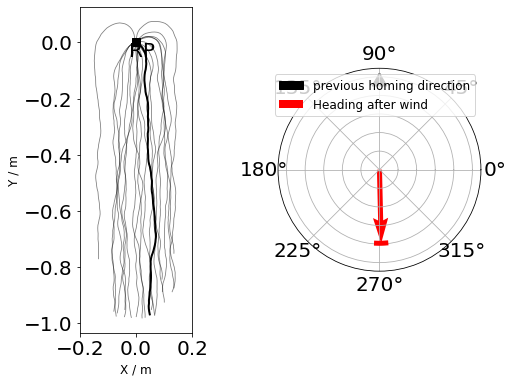

In [59]:
fontsize = 20
sub_fontsize = 12

fig = plt.figure(figsize=(8,6))

# load data for westward wind
data_west_wind = sio.loadmat('results/Backtracking.mat')
h_s = data_west_wind['h']
pos_s = data_west_wind['pos']
ax_s_dir = fig.add_subplot(122, projection='polar')
cp_h = h_s[:, 30]
acc = 120 # 5deg goniometer
d_ref = np.linspace(0,2*np.pi,acc)
if len(cp_h):
    h_r, h_mean, h_sd0, h_ci95, r_num = cs.circular_statistics(cp_h,acc=acc)
    ax_s_dir.quiver(0,0,h_r*np.cos(h_mean),h_r*np.sin(h_mean),color='r', scale=0.5,scale_units='y',width=0.025,label='Heading after wind')
    ax_s_dir.plot(np.linspace(h_mean-h_ci95,h_mean+h_ci95,20),np.repeat(h_r*4,20),color='red',lw=5)

d_previous = np.pi/2
tri_len = 0.8
tri_pos_l = 5.2
tri_pr = plt.Polygon([[d_previous,tri_pos_l],
                      [d_previous+np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)],
                      [d_previous-np.arctan2((tri_len/2),tri_pos_l-tri_len*np.cos(np.pi/6)),np.sqrt((tri_len/2)**2+(tri_pos_l-tri_len*np.cos(np.pi/6))**2)]],
                    color='black',label='previous homing direction')
ax_s_dir.add_patch(tri_pr)
# ax_f_dir.scatter(h_mean-h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
# ax_f_dir.scatter(h_mean+h_ci95,h_r*4,s=100,marker='.',color='red',edgecolor='red')
ax_s_dir.set_yticklabels('')
set_sub_ax_ticks_fontsize(ax_s_dir, fontsize)
ax_s_dir.legend(fontsize=sub_fontsize)
# ax_s_dir.set_title('Initial Heading after releasing',fontsize=fontsize)

# # trajectories
select_id = 1
ax_main = fig.add_subplot(121)
ax_main.plot(pos_s[select_id][:, 0], pos_s[select_id][:, 1], lw=2.0, color='k')
for i, pos in enumerate(pos_s):
    ax_main.plot(pos[:,0],pos[:,1], c='k', lw=0.8, alpha=0.5)
set_sub_ax_ticks_fontsize(ax_main, fontsize=fontsize)
# RP
ax_main.scatter(0,0, marker='s',c='k',s=80)
ax_main.text(-0.025,-0.05,'RP',color='k',fontsize=fontsize)

ax_main.set_xlim(-0.2,0.2)
ax_main.set_xticks([-0.2,0.0,0.2])
# ax_main.set_ylim(-0.2,0.2)
ax_main.set_aspect(1)
ax_main.set_xlabel('X / m', fontsize=sub_fontsize)
ax_main.set_ylabel('Y / m', fontsize=sub_fontsize)
# ax_main.set_title('Trajectories of agent after releasing',fontsize=fontsize)
plt.savefig('fig_backtracking_results.pdf')